## 케라스의 SimpleRNN과 LSTM 이해하기
- https://wikidocs.net/106473

### 임의의 입력 생성하기

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [2]:
# 임의의 입력
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


- 단어 벡터의 차원: 5, 문장의 길이가 4인 경우를 가정한 입력
- 4번의 시점timesteps 이 존재, 각 시점마다 5차원의 단어 벡터가 입력으로 사용

In [6]:
# RNN은 3D텐서 입력, 배치크기 1을 추가
# 샘플 1개 -> batch_size=1
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


### SimpleRNN 이해하기
- 출력값 이해
- 대표적인 인자: return_sequences, return_state
    - 둘 다 기본값: False
- 은닉 상태의 크기 3으로 지정
- 실습의 경우, 은닉상태값 자체는 매번 초기화 됨

In [7]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[ 0.8263546  -0.6912391   0.24077451]], shape: (1, 3)


In [10]:
rnn = SimpleRNN(4)
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.4281334  -0.6092685   0.8491458  -0.90140414]], shape: (1, 4)


- 위 텐서는 마지막 시점의 은닉상태
    - return_sequences가 False인 경우, 마지막 시점의 은닉 상태만 출력
- 4개의 시점 -> (1,4,3) 텐서

In [8]:
# return_sequences가 True인 경우
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.9941249   0.99920547 -0.9999953 ]
  [-0.80643773  0.9978798  -0.9999975 ]
  [-0.53236294  0.97828853 -0.9999607 ]
  [-0.03321843  0.9980576  -0.9999494 ]]], shape: (1, 4, 3)


- return_state가 True일 경우,
    - return_sequences의 True/False 여부와 상관없이, 마지막 시점의 은닉 상태를 출력
- return_sequences가 True, return_state를 True로 할 경우 
    - SimpleRNN은 두 개의 출력을 리턴
    - 첫번째 출력은 return_sequences=True로 인한 출력으로 모든 시점의 은닉 상태
    - 두번째 출력은 return_state=True로 인한 출력으로 마지막 시점의 은닉 상태

In [11]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[-0.9786546   0.9378133   0.9992005 ]
  [-0.96820015  0.06101577  0.9907626 ]
  [-0.87938434  0.74833053  0.8618502 ]
  [-0.9921206  -0.5912804   0.695062  ]]], shape: (1, 4, 3)
last hidden state : [[-0.9921206 -0.5912804  0.695062 ]], shape: (1, 3)


- return_sequences는 False인데, retun_state가 True인 경우
    - 두 개의 출력 모두 마지막 시점의 은닉 상태를 출력

In [12]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[-0.01495896  0.87626815 -0.95472646]], shape: (1, 3)
last hidden state : [[-0.01495896  0.87626815 -0.95472646]], shape: (1, 3)


### LSTM 이해하기
- 임의의 입력에 대해서 LSTM을 사용할 경우
- return_sequences를 False, return_state가 True인 경우
    - SimpleRNN 때와는 달리, 세 개의 결과를 반환
    - return_sequences가 False -> 첫번째 결과는 마지막 시점의 은닉 상태
    - 마지막 시점의 은닉 상태뿐만 아니라 셀 상태까지 반환함

In [13]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[-0.2994898  -0.0676982  -0.06696864]], shape: (1, 3)
last hidden state : [[-0.2994898  -0.0676982  -0.06696864]], shape: (1, 3)
last cell state : [[-0.39478138 -0.08634433 -0.534264  ]], shape: (1, 3)


- return_sequences를 True인 경우
    - return_state=True -> 마지막 은닉상태 출력,
    - 마지막 셀 상태 출력
    - return_sequences=True -> 모든 시점의 은닉상태 출력

In [14]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-0.31839642 -0.4613134   0.03274506]
  [-0.3815911  -0.22462505  0.04618236]
  [-0.4938481  -0.18394123 -0.00670173]
  [-0.63974935 -0.2705685  -0.13390256]]], shape: (1, 4, 3)
last hidden state : [[-0.63974935 -0.2705685  -0.13390256]], shape: (1, 3)
last cell state : [[-1.311013   -1.9967332  -0.22405164]], shape: (1, 3)


### Bidirectional(LSTM) 이해하기
- 양방향 LSTM 출력값 확인
- 은닉 상태의 값 고정

In [15]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

- return_sequences가 False, return_state가 True인 경우
    - 첫번째 출력값: 크기 (1,6)
        - 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태가 연결된 채 반환
    - return_state=True 인 경우
        - 4가지 반환: 정방향 LSTM의 은닉상태, 셀 상태, 역방향 LSTM의 은닉상태, 셀 상태
        - 셀 상태는 각각 forward_c와 backward_c에 저장만 하고 출력하지 않음
        - forward_h와 backward_h: 각각 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태값

In [17]:
# 무려 5개의 값을 반환
# 이라고 되어 있는데 어디가 5개?

In [16]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


- 정방향 LSTM의 마지막 시점의 은닉 상태값 : [0.6303139 0.6303139 0.6303139]
- 역방향 LSTM의 첫번째 시점의 은닉 상태값 : [0.70387346 0.70387346 0.70387346]

- return_sequences를 True로 할 경우
    - hidden states의 출력값에서는 이제 모든 시점의 은닉 상태가 출력
    - 역방향 LSTM의 첫번째 시점의 은닉 상태는 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는 것이 아니라 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결됨

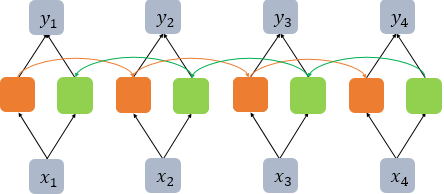

In [18]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [19]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)
